# Validation of entanglement generation functions

In [1]:
import numpy as np
import numpy.matlib as npm
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import copy
import warnings
import scipy
from scipy import sparse
from tqdm.notebook import tqdm
import importlib as imp
import random

import main_cd as main
import main_cd_plots as pltm

---

# Physical network

In [2]:
imp.reload(main)

# Build adjacency matrix repeater chain
n = 4 # Number of nodes in the chain
A_chain = main.adjacency_chain(n)

# Build adjacency matrix squared grid
l = 3 # Number of nodes per side of the squared grid
A_grid = main.adjacency_squared(l)

print(A_chain)
print(A_grid)

[[0. 1. 0. 0.]
 [1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 1. 1. 1. 0. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 0.]]


---

# GEN in a repeater chain

In [3]:
# Inputs
p = 1
r = 2

# Seed
randomseed = 2
np.random.seed(randomseed)

In [4]:
# Create qubit register
imp.reload(main)

registers = main.create_qubit_registers(A_chain, r)

for i in range(len(registers)):
    print(registers[i])

[0.0, [None, None], 0.0, 0.0]
[[None, None], 0.0, [None, None], 0.0]
[0.0, [None, None], 0.0, [None, None]]
[0.0, 0.0, [None, None], 0.0]


[0.0, [[0, 0, [1, 0, 0]], None], 0.0, 0.0]
[[[0, 0, [0, 1, 0]], None], 0.0, [[0, 0, [2, 1, 0]], None], 0.0]
[0.0, [[0, 0, [1, 2, 0]], None], 0.0, [[0, 0, [3, 2, 0]], None]]
[0.0, 0.0, [[0, 0, [2, 3, 0]], None], 0.0]
0 (0, 1, 0) (1, 0, 0)
0 (1, 2, 0) (2, 1, 0)
0 (2, 3, 0) (3, 2, 0)


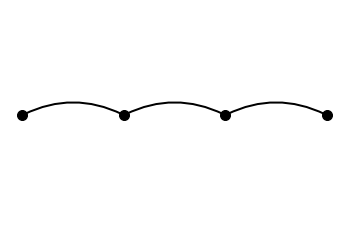

In [5]:
# GEN
imp.reload(main)
imp.reload(pltm)

registers = main.generate_all_links(registers, p)

for i in range(len(registers)):
    print(registers[i])
    
pltm.plot_entangled_links(registers, layout='chain', show_link_data=True)

---

# GEN in a squared grid

In [18]:
# Inputs
p = 1
r = 2

# Seed
randomseed = 2
np.random.seed(randomseed)

In [19]:
# Create qubit register
imp.reload(main)

registers = main.create_qubit_registers(A_grid, r)

for i in range(len(registers)):
    print(registers[i])

[0.0, [None, None], [None, None], [None, None], 0.0, 0.0, [None, None], 0.0, 0.0]
[[None, None], 0.0, [None, None], 0.0, [None, None], 0.0, 0.0, [None, None], 0.0]
[[None, None], [None, None], 0.0, 0.0, 0.0, [None, None], 0.0, 0.0, [None, None]]
[[None, None], 0.0, 0.0, 0.0, [None, None], [None, None], [None, None], 0.0, 0.0]
[0.0, [None, None], 0.0, [None, None], 0.0, [None, None], 0.0, [None, None], 0.0]
[0.0, 0.0, [None, None], [None, None], [None, None], 0.0, 0.0, 0.0, [None, None]]
[[None, None], 0.0, 0.0, [None, None], 0.0, 0.0, 0.0, [None, None], [None, None]]
[0.0, [None, None], 0.0, 0.0, [None, None], 0.0, [None, None], 0.0, [None, None]]
[0.0, 0.0, [None, None], 0.0, 0.0, [None, None], [None, None], [None, None], 0.0]


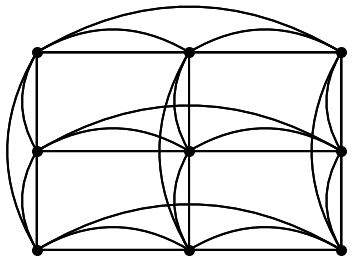

In [42]:
# GEN
imp.reload(main)
imp.reload(pltm)

registers = main.generate_all_links(registers, p)

#for i in range(len(registers)):
#    print(registers[i])
    
pltm.plot_entangled_links(registers, layout='squared', show_link_data=False)

---

# Statistical behavior

Here, we check that the ratio of links generated on average equals $p$.

In [79]:
# Inputs
p_array = np.arange(0,1,0.1)
n = 4
l = 4
r = 2 # This is irrelevant for this test

# Numerical
N_samples = 10000
randomseed = 2
np.random.seed(randomseed)

In [80]:
## Repeater chain ##
imp.reload(main)

A_chain = main.adjacency_chain(n)

for p in p_array:
    # Number of physical links
    total_physical_links = n-1

    # Calculate ratio of links generated on average
    ratio_links = []
    for sample in range(N_samples):
        registers = main.create_qubit_registers(A_chain, r)
        registers = main.generate_all_links(registers, p)
        ratio_links += [main.total_qubits_occupied(registers)/2/total_physical_links]

    # Average ratio of links generated
    ratio_links_avg = np.mean(ratio_links)

    # Print 95% interval of confidence for the mean
    ratio_links_stderr = np.std(ratio_links)/(N_samples**0.5)
    print('%.2f (%.2f)'%(ratio_links_avg,2*ratio_links_stderr))

0.00 (0.00)
0.10 (0.00)
0.20 (0.00)
0.30 (0.01)
0.40 (0.01)
0.50 (0.01)
0.59 (0.01)
0.70 (0.01)
0.80 (0.00)
0.90 (0.00)


In [82]:
## Repeater chain ##
imp.reload(main)

A_grid = main.adjacency_squared(l)

for p in p_array:
    # Number of physical links
    total_physical_links = 2*l*l

    # Calculate ratio of links generated on average
    ratio_links = []
    for sample in range(N_samples):
        registers = main.create_qubit_registers(A_grid, r)
        registers = main.generate_all_links(registers, p)
        ratio_links += [main.total_qubits_occupied(registers)/2/total_physical_links]

    # Average ratio of links generated
    ratio_links_avg = np.mean(ratio_links)

    # Print 95% interval of confidence for the mean
    ratio_links_stderr = np.std(ratio_links)/(N_samples**0.5)
    print('%.2f (%.2f)'%(ratio_links_avg,2*ratio_links_stderr))

0.00 (0.00)
0.10 (0.00)
0.20 (0.00)
0.30 (0.00)
0.40 (0.00)
0.50 (0.00)
0.60 (0.00)
0.70 (0.00)
0.80 (0.00)
0.90 (0.00)
